In [100]:
import pandas as pd
import zipfile

In [101]:
with zipfile.ZipFile('4_data.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [102]:
import os


In [103]:
# task 2

for path, dirs, files in os.walk('data'):
    print(path, dirs, files)

data ['2020-12-08', '2020-12-04', '2020-12-05', '2020-12-07', '2020-12-06', '2020-12-03', '2020-12-09'] []
data/2020-12-08 ['Rostislav_Petrov', 'Alexey_Fedorov', 'Petr_Petrov', 'Anton_Smirnov', 'Kirill_Smirnov'] []
data/2020-12-08/Rostislav_Petrov [] ['data.csv']
data/2020-12-08/Alexey_Fedorov [] ['data.csv']
data/2020-12-08/Petr_Petrov [] ['data.csv']
data/2020-12-08/Anton_Smirnov [] ['data.csv']
data/2020-12-08/Kirill_Smirnov [] ['data.csv']
data/2020-12-04 ['Vasiliy_Ivanov', 'Petr_Smirnov', 'Petr_Ivanov', 'Kirill_Fedorov', 'Alexey_Smirnov', 'Rostislav_Ivanov', 'Rostislav_Fedorov', 'Rostislav_Smirnov', 'Petr_Fedorov'] []
data/2020-12-04/Vasiliy_Ivanov [] ['data.csv']
data/2020-12-04/Petr_Smirnov [] ['data.csv']
data/2020-12-04/Petr_Ivanov [] ['data.csv']
data/2020-12-04/Kirill_Fedorov [] ['data.csv']
data/2020-12-04/Alexey_Smirnov [] ['data.csv']
data/2020-12-04/Rostislav_Ivanov [] ['data.csv']
data/2020-12-04/Rostislav_Fedorov [] ['data.csv']
data/2020-12-04/Rostislav_Smirnov [] ['d

In [104]:
# обнаруживаем data.csv в списке файлов
# ...взять из строк отдельно имя и отдельно дату?

df_final = pd.DataFrame(columns=['product_id','quantity','name','date'])

#
# благодаря исследованию, исходим из того, что dirs при первой итерации - это список дат
# делаем walk-итерацию по датам, сохраняя дату в переменную,
# при каждой итерации по датам, исходим из того, что dirs - это список  имен
# делаем walk-итерацию по именам, сохраняя имя в переменную,
# исходим из того, что при итерации по именам, каждый files - это один файл csv
# загружаем файл в промежуточный DataFrame и присоединяем к нему два столбца с ранее сохраненными переменными по дате и имени (с соответствующими значениями)
# пытаемся присоединить к df_final, если не получается - создаем в начале df_final (пустой) со всеми нужными колонками в нужных типах



In [105]:
# type(df_final)

In [106]:


for i in os.listdir('data'):
    for k in os.listdir(f'data/{i}'):
        df = pd.read_csv(f'data/{i}/{k}/data.csv',sep=',')
        df = df[['product_id','quantity']]
        df['name'] = k
        df['date'] = i
        df_final = pd.concat([df,df_final])

In [107]:
df_final

product_id quantity              name        date
0          79        3      Petr_Fedorov  2020-12-09
0          79        3     Anton_Smirnov  2020-12-09
1          33        1     Anton_Smirnov  2020-12-09
2          81        3     Anton_Smirnov  2020-12-09
3          70        4     Anton_Smirnov  2020-12-09
..        ...      ...               ...         ...
1          24        2  Rostislav_Petrov  2020-12-08
2          23        1  Rostislav_Petrov  2020-12-08
3          27        5  Rostislav_Petrov  2020-12-08
4          32        3  Rostislav_Petrov  2020-12-08
5          50        5  Rostislav_Petrov  2020-12-08

[161 rows x 4 columns]

In [108]:
df_final = df_final.reset_index().drop(columns=['index'])

In [109]:
df_final

product_id quantity              name        date
0           79        3      Petr_Fedorov  2020-12-09
1           79        3     Anton_Smirnov  2020-12-09
2           33        1     Anton_Smirnov  2020-12-09
3           81        3     Anton_Smirnov  2020-12-09
4           70        4     Anton_Smirnov  2020-12-09
..         ...      ...               ...         ...
156         24        2  Rostislav_Petrov  2020-12-08
157         23        1  Rostislav_Petrov  2020-12-08
158         27        5  Rostislav_Petrov  2020-12-08
159         32        3  Rostislav_Petrov  2020-12-08
160         50        5  Rostislav_Petrov  2020-12-08

[161 rows x 4 columns]

In [110]:
df_final.quantity.sum()

480

In [111]:
df_final.sort_values('date')

product_id quantity              name        date
39         14        2    Alexey_Smirnov  2020-12-03
30         83        2     Kirill_Petrov  2020-12-03
29         10        3     Kirill_Petrov  2020-12-03
28         77        1     Kirill_Petrov  2020-12-03
27         27        3    Vasiliy_Petrov  2020-12-03
..        ...      ...               ...         ...
19         54        3    Vasiliy_Ivanov  2020-12-09
20         64        2  Rostislav_Petrov  2020-12-09
21         66        4  Rostislav_Petrov  2020-12-09
12         56        5    Alexey_Smirnov  2020-12-09
0          79        3      Petr_Fedorov  2020-12-09

[161 rows x 4 columns]

In [112]:
df_final.quantity.sum()

480

In [113]:
# task 3

df_final.groupby(['name']).quantity.sum().reset_index().sort_values('quantity',ascending=False)

name  quantity
3      Alexey_Smirnov        52
13       Petr_Smirnov        52
6       Anton_Smirnov        45
10       Petr_Fedorov        34
7      Kirill_Fedorov        28
16   Rostislav_Petrov        28
19     Vasiliy_Ivanov        27
0      Alexey_Fedorov        24
4        Anton_Ivanov        23
11        Petr_Ivanov        21
5        Anton_Petrov        18
9      Kirill_Smirnov        17
1       Alexey_Ivanov        17
17  Rostislav_Smirnov        17
14  Rostislav_Fedorov        16
18    Vasiliy_Fedorov        15
12        Petr_Petrov        14
8       Kirill_Petrov         9
15   Rostislav_Ivanov         9
2       Alexey_Petrov         7
20     Vasiliy_Petrov         7

In [149]:
# task 4

df_task4 = df_final.groupby(['product_id']).quantity.sum().reset_index().sort_values('quantity',ascending=False)
df_task4 = df_task4[:10]
df_task4


product_id  quantity
22          27        20
42          56        18
21          24        15
51          74        15
32          41        14
27          34        13
66          94        13
46          66        13
65          92        12
38          50        12

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.figure(figsize = (100,100))

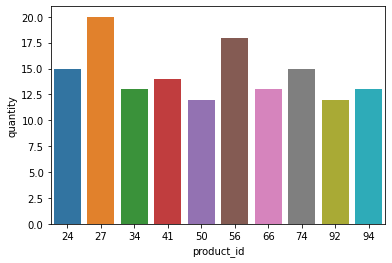

In [162]:
sns.barplot(x="product_id",y="quantity", data = df_task4)

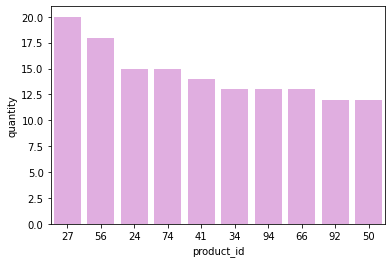

In [171]:
sns.barplot(x="product_id",y="quantity", data = df_task4, order=df_task4['product_id'],alpha=0.35,color='m')

In [178]:
# task 5

df_task5 = df_final.groupby(['date']).quantity.sum().reset_index()\
#.sort_values('quantity',ascending=False)

In [179]:
df_task5

date  quantity
0  2020-12-03        60
1  2020-12-04       113
2  2020-12-05        61
3  2020-12-06        15
4  2020-12-07        94
5  2020-12-08        68
6  2020-12-09        69

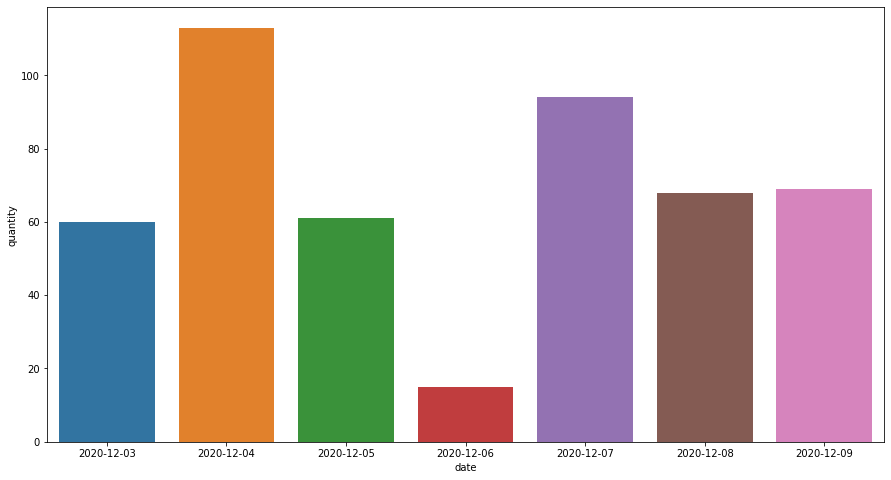

In [180]:
plt.figure(figsize=(15,8))

sns.barplot(x="date",y="quantity", data = df_task5, order=df_task5['date'])

In [199]:
# task 6
df_task6 = df_final.drop_duplicates(subset=['name','date','product_id'])

df_task6 =  df_task6.groupby(['product_id','name']).quantity.count().reset_index()\
#.sort_values('quantity',ascending=False)

df_task6

product_id               name  quantity
0             0     Vasiliy_Ivanov         1
1             1     Alexey_Smirnov         1
2             3     Kirill_Fedorov         1
3             3       Petr_Smirnov         1
4             4     Alexey_Smirnov         1
..          ...                ...       ...
153          95     Vasiliy_Ivanov         1
154          96       Petr_Smirnov         1
155          97    Vasiliy_Fedorov         1
156          99     Alexey_Fedorov         1
157          99  Rostislav_Smirnov         1

[158 rows x 3 columns]

In [200]:
df_task6 = df_task6.query('quantity > 1')

In [201]:
df_task6

product_id          name  quantity
24           15  Anton_Ivanov         2
150          94  Petr_Fedorov         2

In [202]:
df_task6.name.nunique()

2